In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#### Data source
* https://archive.ics.uci.edu/ml/datasets/spambase
* to load file : wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
* this is a CSV with no header, see below list of headers to use

In [2]:
import pandas as pd

In [3]:
colnames = ["word_freq_make", "word_freq_address", "word_freq_al", "word_freq_3d", "word_freq_our",
            "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
            "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
            "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
            "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl",
            "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet",
            "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
            "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs",
            "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
            "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!",
            "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
            "capital_run_length_total", "category"]

In [4]:
spam = pd.read_csv('spambase/spambase.data', header=None, names=colnames)

In [5]:
spam.shape

(4601, 58)

#### Package to use for GAM : https://github.com/dswah/pyGAM
* pip install pygam
* conda install scikit-sparse nose

In [6]:
from pygam import LogisticGAM
from pygam.utils import generate_X_grid

In [7]:
allpredictors = colnames[0:-1]
keptpredictors = allpredictors[0:5] # modify this line to include more/less predictors

In [8]:
X = spam[keptpredictors].values 
y = spam[colnames[-1]].values

In [9]:
gam = LogisticGAM().gridsearch(X, y) # WARNING : this may be very long to run

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/home/ubuntu/anaconda2/lib/python2.7/site-packages/pygam/utils.py:68: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)
100% (11 of 11) |#########################| Elapsed Time: 0:00:05 Time: 0:00:05


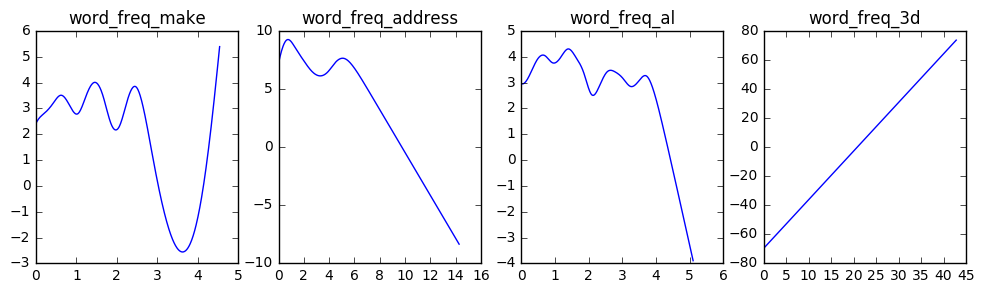

In [10]:
XX = generate_X_grid(gam)

plt.figure(figsize = (12, 3))
#fig, axs = plt.subplots(1, 5)
titles = keptpredictors

for i, title in enumerate(titles[0:4]):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax = plt.subplot(1, 4, i+1)
    ax.plot(XX[:, i], pdep)
    #ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(title)